# Function used to Find page and Crop image 

Defitions and constant

In [5]:
import cv2
import sys
import numpy as np
from IPython.display import display
from PIL import Image
from src.logger import logger
import myclass as my
from matplotlib import pyplot as plt
MIN_PAGE_AREA = 80000

used this function to return sheet of four point of page <br />
find ORIGIN for the quadrants

In [6]:
def find_page( image):  
        image = my.normalize(image)
        _ret, image = cv2.threshold(image, 200, 255, cv2.THRESH_TRUNC)
        image =my.normalize(image)
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 10))
        closed = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
        edge = cv2.Canny(closed, 185, 55)
        cnts = my.grab_contours(
            cv2.findContours(edge, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        )
        cnts = [cv2.convexHull(c) for c in cnts]
        cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:5]
        sheet = []
        for c in cnts:
            if cv2.contourArea(c) < MIN_PAGE_AREA:
                continue
            peri = cv2.arcLength(c, True)
            approx = cv2.approxPolyDP(c, epsilon=0.025 * peri, closed=True)
            if True:
                sheet = np.reshape(approx, (4, -1))
                cv2.drawContours(image, [approx], -1, (0,255, 0), 2)
                cv2.drawContours(edge, [approx], -1, (255, 255, 255), 10)
                break
        return sheet


function used to find page and crop image based sheet return from Find page 
sheet content four point of rectangle page


In [7]:
def apply_filter(image):
        image = my.normalize(cv2.GaussianBlur(image, (3, 3), 0))
        # Resize should be done with another preprocessor is needed
        sheet = find_page(image)
        display(sheet)
        if sheet == []:
            logger.error(
                "\tError: Paper boundary not found! \
                Have you accidentally included CropPage preprocessor?"
            )
            return None
        # cv2.waitKey(0)
        # Warp layer 1
        image = my.four_point_transform(image, sheet)
        

        # Return preprocessed image
        return image


# Input image

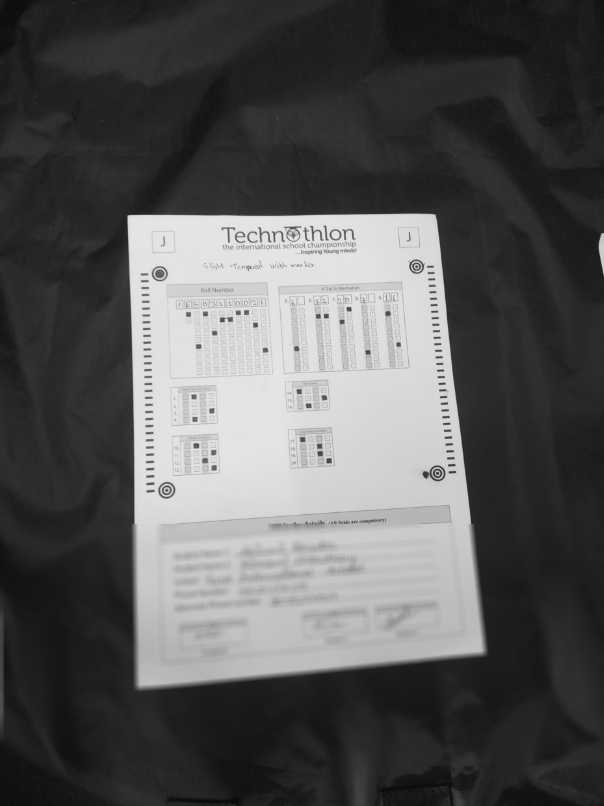

In [11]:
image =cv2.imread("samples/sample1/MobileCamera/sheet1.jpg", cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, None, fx = 0.65, fy = 0.65)
display(Image.fromarray(image))

# output

array([[474, 565],
       [132, 525],
       [127, 216],
       [435, 215]], dtype=int32)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


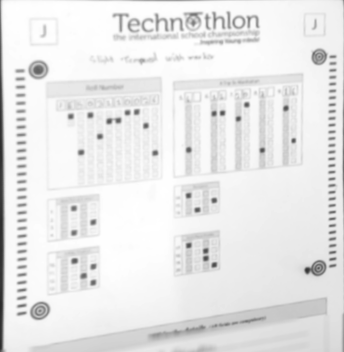

In [13]:
display(Image.fromarray(apply_filter( image)))